# COVID-19 AUSTRIA GRAPHS

Download csv file

In [31]:
import urllib.request
url = 'https://raw.githubusercontent.com/covid19-eu-zh/covid19-eu-data/master/dataset/covid-19-at.csv'
filename = 'covid_data/covid-19-at.csv'
urllib.request.urlretrieve(url, filename)

('covid_data/covid-19-at.csv', <http.client.HTTPMessage at 0x25e77d417b8>)

Get most recent data from csv file

In [32]:
import csv
import datetime
from datetime import date

today = date.today()
today = today.strftime("%y-%m-%d")
print("Today's date:", today)

safe_date = date.today()-datetime.timedelta(2)
safe = safe_date.strftime("%y-%m-%d")
print("Safe date:", safe)

date_time_str = '2018-06-29T08:15:27'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%S')

with open('covid_data/covid-19-at.csv', 'r') as i, open('covid_data/covid-19-austria.csv', 'w', newline='') as o:
    r = csv.reader(i, delimiter=',')
    writer = csv.writer(o)
    writer.writerow(["country", "name", "cases", "recovered", "deaths", "tests", "hospitalized", "intensive_care", "datetime"])
    #for row in r:
    #    if row[8] == "2020-05-09T15:00:00": 
    #        writer.writerow(row)
    #        print(row)
    max_value = date_time_obj
    #most recent date
    for row in r:
        if today in row[8]:
            date_time = row[8]
            date_time_object = datetime.datetime.strptime(date_time, '%Y-%m-%dT%H:%M:%S')
            if date_time_object > max_value: 
                max_value = date_time_object
    print("Most recent date: ", max_value)
    
                
                
                
with open('covid_data/covid-19-at.csv', 'r') as i, open('covid_data/covid-19-austria.csv', 'w', newline='') as o:
    r = csv.reader(i, delimiter=',')
    writer = csv.writer(o)
    writer.writerow(["country", "name", "cases", "recovered", "deaths", "tests", "hospitalized", "intensive_care", "datetime"])
                
    #create csv with most recent data           
    for row in r:
        if today in row[8]:
            date_time = row[8]
            date_time_object = datetime.datetime.strptime(date_time, '%Y-%m-%dT%H:%M:%S')
            if date_time_object == max_value: 
                writer.writerow(row)
                print(row)    
        

        

Today's date: 20-05-29
Safe date: 20-05-27
Most recent date:  2020-05-29 15:00:00
['AT', 'Burgenland', '341', '325', '11', '12875', '2', '0', '2020-05-29T15:00:00']
['AT', 'KÃ¤rnten', '414', '398', '13', '16663', '0', '0', '2020-05-29T15:00:00']
['AT', 'Vorarlberg', '898', '866', '19', '20871', '0', '0', '2020-05-29T15:00:00']
['AT', 'Salzburg', '1220', '1193', '38', '32933', '3', '0', '2020-05-29T15:00:00']
['AT', 'Steiermark', '1837', '1638', '147', '49559', '7', '1', '2020-05-29T15:00:00']
['AT', 'OberÃ¶sterreich', '2294', '2212', '60', '61552', '7', '0', '2020-05-29T15:00:00']
['AT', 'NiederÃ¶sterreich', '2864', '2654', '100', '66422', '26', '11', '2020-05-29T15:00:00']
['AT', 'Wien', '3170', '2645', '172', '101078', '46', '10', '2020-05-29T15:00:00']
['AT', 'Tirol', '3537', '3416', '108', '72349', '12', '3', '2020-05-29T15:00:00']
['AT', '', '16575', '15347', '668', '434302', '103', '25', '2020-05-29T15:00:00']


## Data in Graphs

In [33]:
dict = []

for feature in map_layer.getFeatures():
    if feature['NAME_1']:
        state = feature['NAME_1']
        if feature['Data_deaths']:
            death = feature['Data_deaths']
        else:
            death = 0
        if feature['Data_cases']:
            confirmed = feature['Data_cases']
        else:
            confirmed = 0
        if feature['Data_recovered']:
            recovered = feature['Data_recovered']
        else:
            recovered = 0
        if feature['Data_tests']:
            tests = feature['Data_tests']
        else:
            tests = 0
        if feature['Data_hospitalized']:
            hospitalized = feature['Data_hospitalized']
        else:
            hospitalized = 0
        if feature['Data_intensive_care']:
            intensive_care = feature['Data_intensive_care']
        else:
            intensive_care = 0
        
    e = {'Name': state, 'Confirmed': confirmed, 'Death': death, 'Recovered': recovered, 'Tests': tests, 'Hospitalized': hospitalized, 'Intensive Care': intensive_care }
    dict.append(e)

In [34]:
size = len(dict)-5

c = sorted(dict, key = lambda i: i['Confirmed'],reverse=True)
d = sorted(dict, key = lambda i: i['Death'],reverse=True)
r = sorted(dict, key = lambda i: i['Recovered'],reverse=True)
t = sorted(dict, key = lambda i: i['Tests'],reverse=True)
h = sorted(dict, key = lambda i: i['Hospitalized'],reverse=True)
i = sorted(dict, key = lambda i: i['Intensive Care'],reverse=True)

top5confirmed = c[0:5]
top5death = d[0:5]
top5recovered = r[0:5]
top5tests = t[0:5]
top5hospitalized = h[0:5]
top5intensive_care = i[0:5]

bottom5confirmed = c[size:]
bottom5death = d[size:]
bottom5recovered = r[size:]
bottom5tests = r[size:]
bottom5hospitalized = h[size:]
bottom5intensive_care = i[size:]


### Top 5 Cases Confirmed

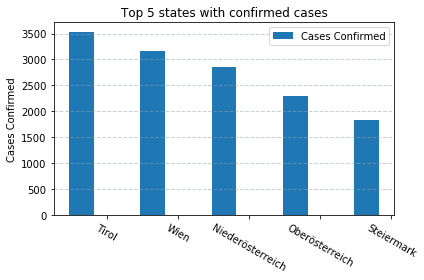

In [35]:
delta1 = [c[0]['Confirmed'],c[1]['Confirmed'],c[2]['Confirmed'],c[3]['Confirmed'],c[4]['Confirmed']]
states = [c[0]['Name'],c[1]['Name'],c[2]['Name'],c[3]['Name'],c[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, align='center', label='Cases Confirmed')


plt.ylabel('Cases Confirmed')
plt.title('Top 5 states with confirmed cases')
plt.xticks(index + bar_width,states, rotation=-30)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/top5_cases_confirmed.png', dpi=300, format='png')
plt.tight_layout()
plt.show()



### Bottom 5 Cases Confirmed

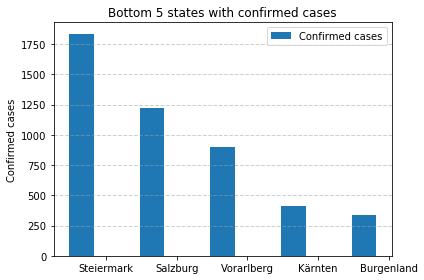

In [36]:
delta1 = [bottom5confirmed[0]['Confirmed'],bottom5confirmed[1]['Confirmed'],bottom5confirmed[2]['Confirmed'],bottom5confirmed[3]['Confirmed'],bottom5confirmed[4]['Confirmed']]
states = [bottom5confirmed[0]['Name'],bottom5confirmed[1]['Name'],bottom5confirmed[2]['Name'],bottom5confirmed[3]['Name'],bottom5confirmed[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Confirmed cases')

plt.ylabel('Confirmed cases')
plt.title('Bottom 5 states with confirmed cases')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/bottom5_cases_confirmed.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Top 5 Deaths

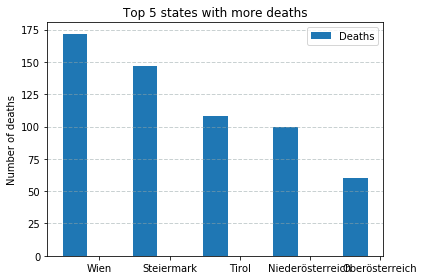

In [37]:
delta1 = [top5death[0]['Death'],top5death[1]['Death'],top5death[2]['Death'],top5death[3]['Death'],top5death[4]['Death']]
states = [top5death[0]['Name'],top5death[1]['Name'],top5death[2]['Name'],top5death[3]['Name'],top5death[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Deaths')

plt.ylabel('Number of deaths')
plt.title('Top 5 states with more deaths')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/top5_deaths_confirmed.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Bottom 5 Mortes

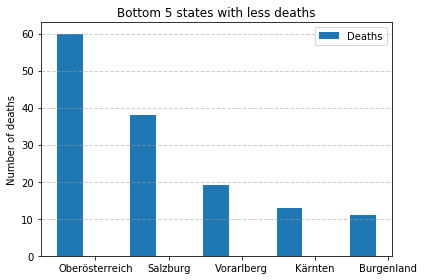

In [38]:
delta1 = [bottom5death[0]['Death'],bottom5death[1]['Death'],bottom5death[2]['Death'],bottom5death[3]['Death'],bottom5death[4]['Death']]
states = [bottom5death[0]['Name'],bottom5death[1]['Name'],bottom5death[2]['Name'],bottom5death[3]['Name'],bottom5death[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Deaths')

plt.ylabel('Number of deaths')
plt.title('Bottom 5 states with less deaths')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/bottom5_deaths_confirmed.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Top 5 Recovered cases

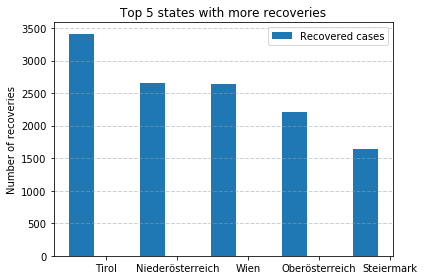

In [39]:
delta1 = [top5recovered[0]['Recovered'],top5recovered[1]['Recovered'],top5recovered[2]['Recovered'],top5recovered[3]['Recovered'],top5recovered[4]['Recovered']]
states = [top5recovered[0]['Name'],top5recovered[1]['Name'],top5recovered[2]['Name'],top5recovered[3]['Name'],top5recovered[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Recovered cases')

plt.ylabel('Number of recoveries')
plt.title('Top 5 states with more recoveries')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/top5_recovered.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Bottom 5 Recovered Cases

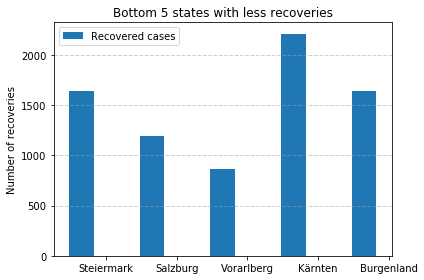

In [40]:
delta1 = [bottom5recovered[0]['Recovered'],bottom5recovered[1]['Recovered'],bottom5recovered[2]['Recovered'],top5recovered[3]['Recovered'],top5recovered[4]['Recovered']]
states = [bottom5recovered[0]['Name'],bottom5recovered[1]['Name'],bottom5recovered[2]['Name'],bottom5recovered[3]['Name'],bottom5recovered[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Recovered cases')

plt.ylabel('Number of recoveries')
plt.title('Bottom 5 states with less recoveries')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/bottom5_recovered.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Top 5 Tests

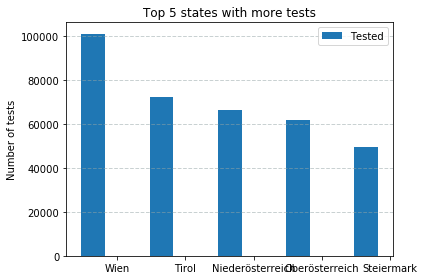

In [41]:
delta1 = [top5tests[0]['Tests'],top5tests[1]['Tests'],top5tests[2]['Tests'],top5tests[3]['Tests'],top5tests[4]['Tests']]
states = [top5tests[0]['Name'],top5tests[1]['Name'],top5tests[2]['Name'],top5tests[3]['Name'],top5tests[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Tested')

plt.ylabel('Number of tests')
plt.title('Top 5 states with more tests')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/top5_tests.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Bottom 5 Tests

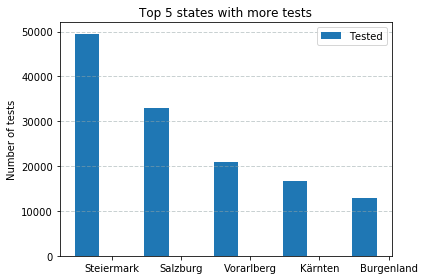

In [42]:
delta1 = [bottom5tests[0]['Tests'],bottom5tests[1]['Tests'],bottom5tests[2]['Tests'],bottom5tests[3]['Tests'],bottom5tests[4]['Tests']]
states = [bottom5tests[0]['Name'],bottom5tests[1]['Name'],bottom5tests[2]['Name'],bottom5tests[3]['Name'],bottom5tests[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Tested')

plt.ylabel('Number of tests')
plt.title('Top 5 states with more tests')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/bottom5_tests.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

## Deaths in AUSTRIA by state

In [43]:
# Import Data
df = pd.read_csv("covid_data/covid-19-austria.csv")

print(df.sort_values('cases', ascending=False))
df2 = df[['name','deaths']]
print(df[['name','deaths']])
print(df2['name'])

  country              name  cases  recovered  deaths   tests  hospitalized  \
9      AT               NaN  16575      15347     668  434302           103   
8      AT             Tirol   3537       3416     108   72349            12   
7      AT              Wien   3170       2645     172  101078            46   
6      AT  Niederösterreich   2864       2654     100   66422            26   
5      AT    Oberösterreich   2294       2212      60   61552             7   
4      AT        Steiermark   1837       1638     147   49559             7   
3      AT          Salzburg   1220       1193      38   32933             3   
2      AT        Vorarlberg    898        866      19   20871             0   
1      AT           Kärnten    414        398      13   16663             0   
0      AT        Burgenland    341        325      11   12875             2   

   intensive_care             datetime  
9              25  2020-05-29T15:00:00  
8               3  2020-05-29T15:00:00  
7      

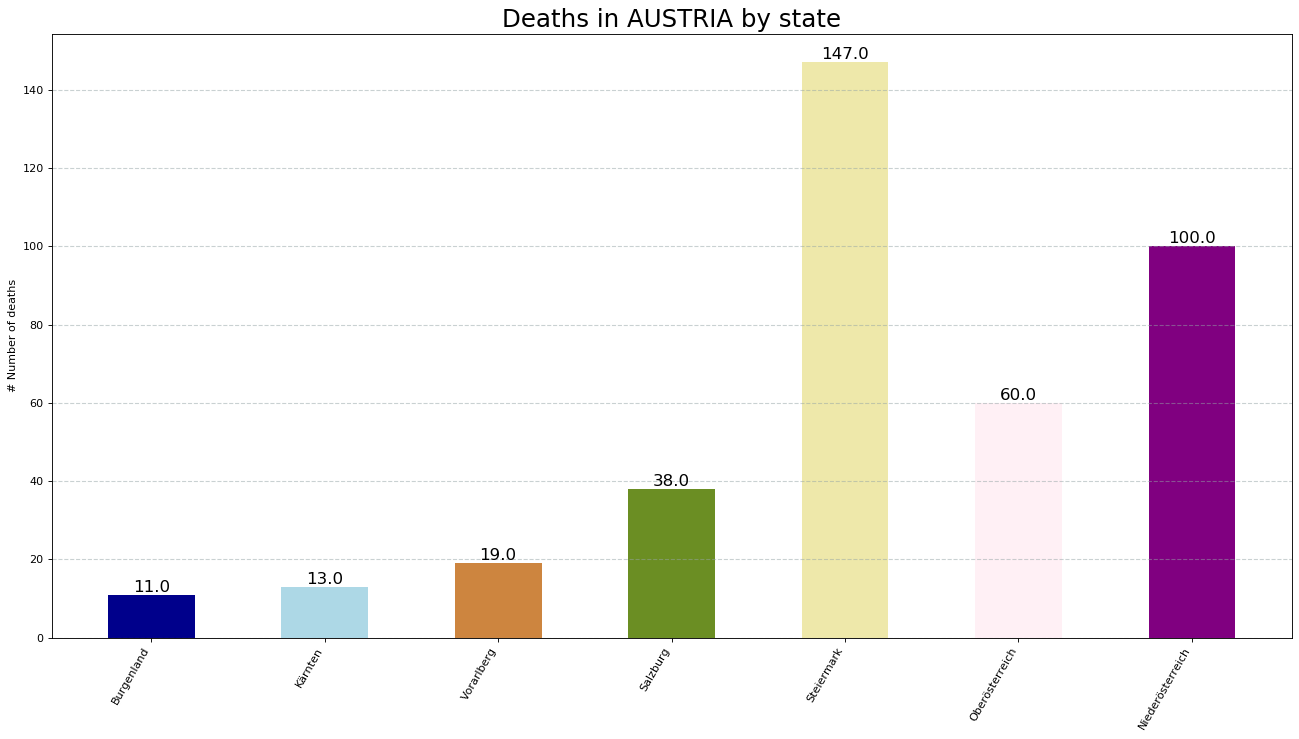

In [44]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','deaths']]
n = df['deaths'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:7]
y = df['deaths'].tolist()[0:7]

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Deaths in AUSTRIA by state", fontsize=22)
plt.ylabel('# Number of deaths')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/deaths.png', dpi=300, format='png')
plt.show()

## Confirmed cases in AUSTRIA by state

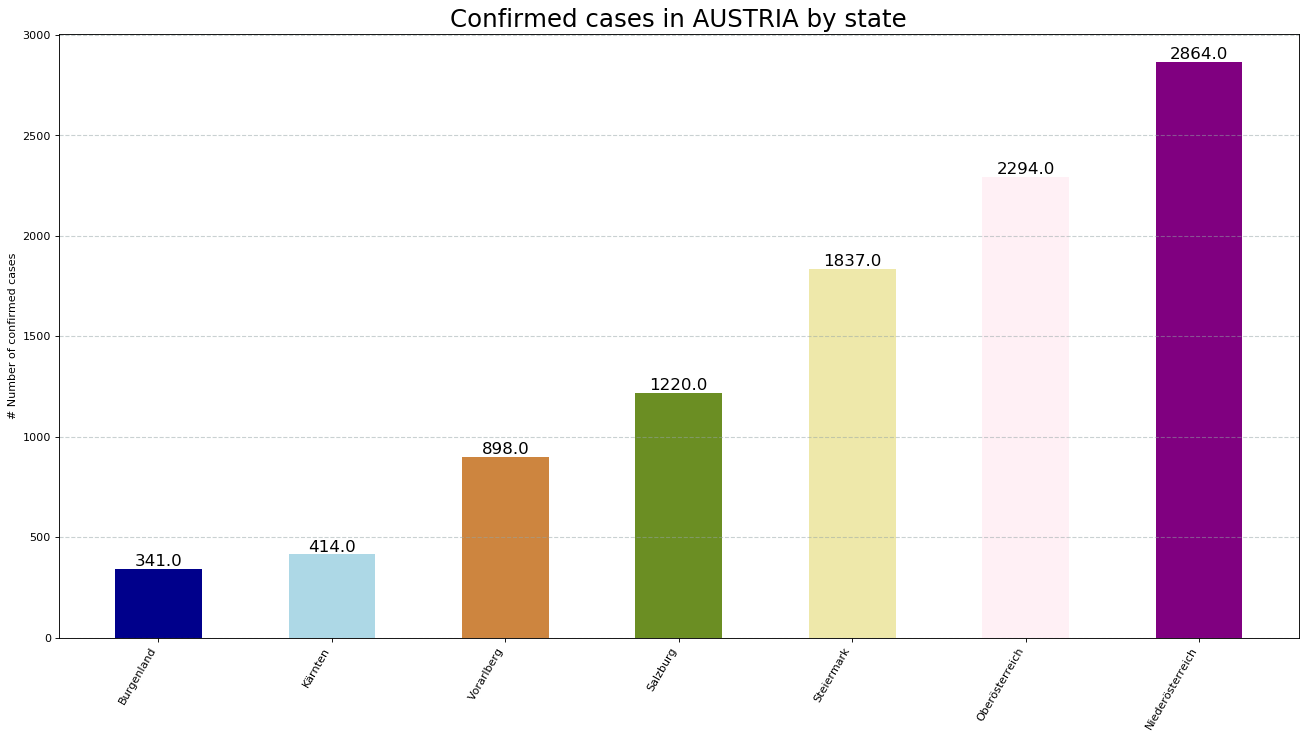

In [45]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','cases']]
n = df['cases'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:7]
y = df['cases'].tolist()[0:7]

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Confirmed cases in AUSTRIA by state", fontsize=22)
plt.ylabel('# Number of confirmed cases')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/confirmed_cases.png', dpi=300, format='png')
plt.show()

## Recoveries in AUSTRIA by state

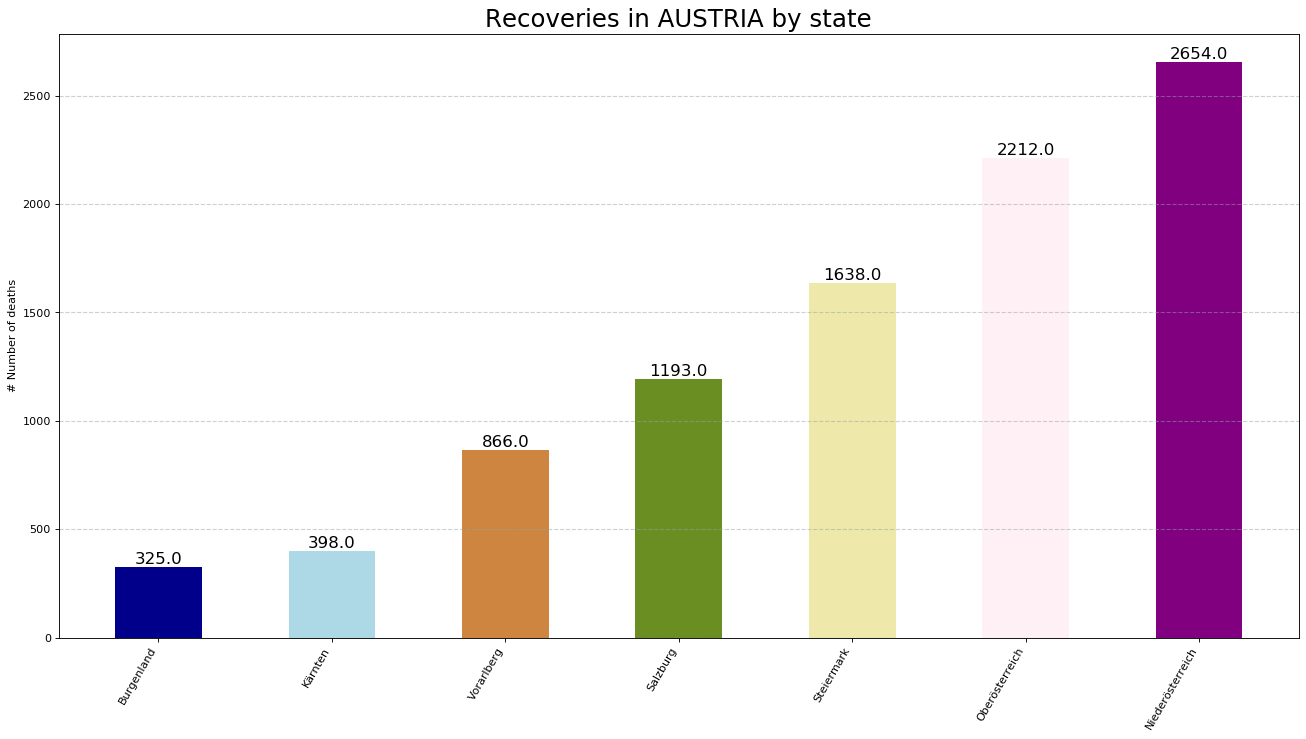

In [46]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','recovered']]
n = df['recovered'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:7]
y = df['recovered'].tolist()[0:7]

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Recoveries in AUSTRIA by state", fontsize=22)
plt.ylabel('# Number of deaths')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/confirmed_cases.png', dpi=300, format='png')
plt.show()

## Hospitalizations in AUSTRIA by state

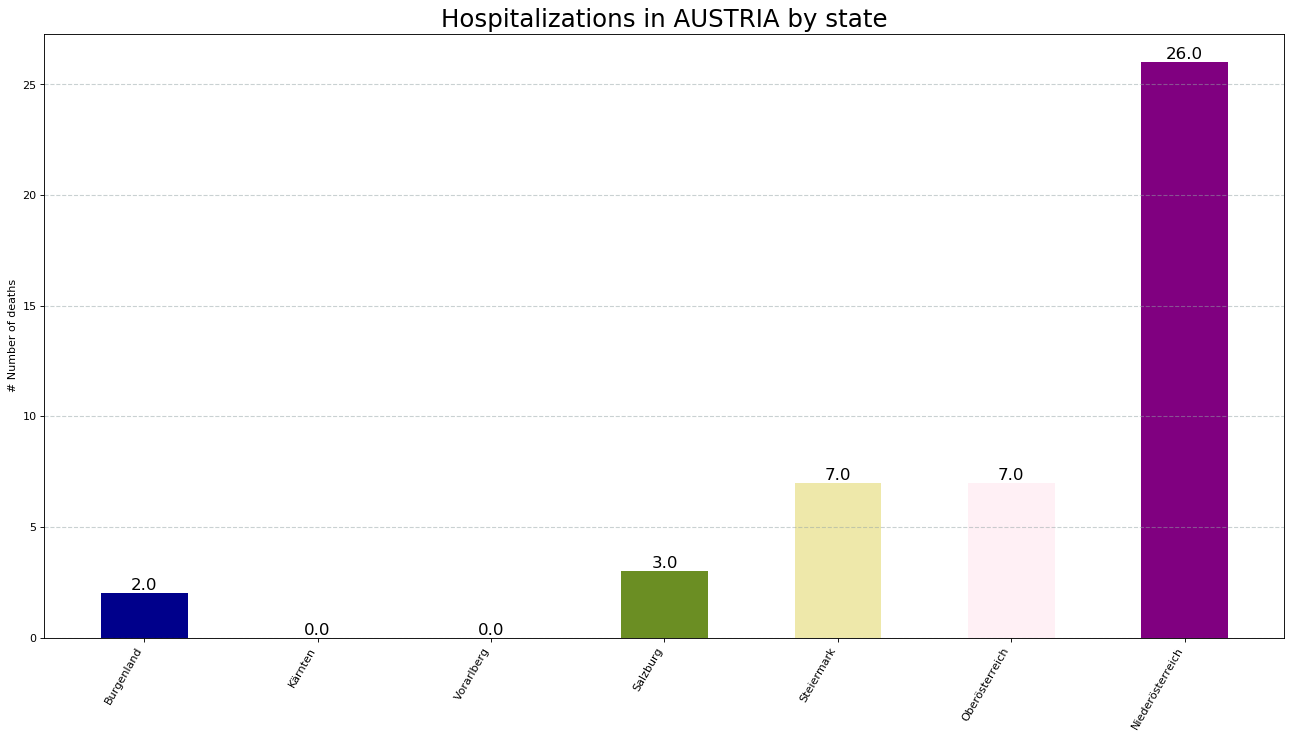

In [47]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','hospitalized']]
n = df['hospitalized'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:7]
y = df['hospitalized'].tolist()[0:7]

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Hospitalizations in AUSTRIA by state", fontsize=22)
plt.ylabel('# Number of deaths')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/hospitalized.png', dpi=300, format='png')
plt.show()

## Intesive Care in AUSTRIA by state

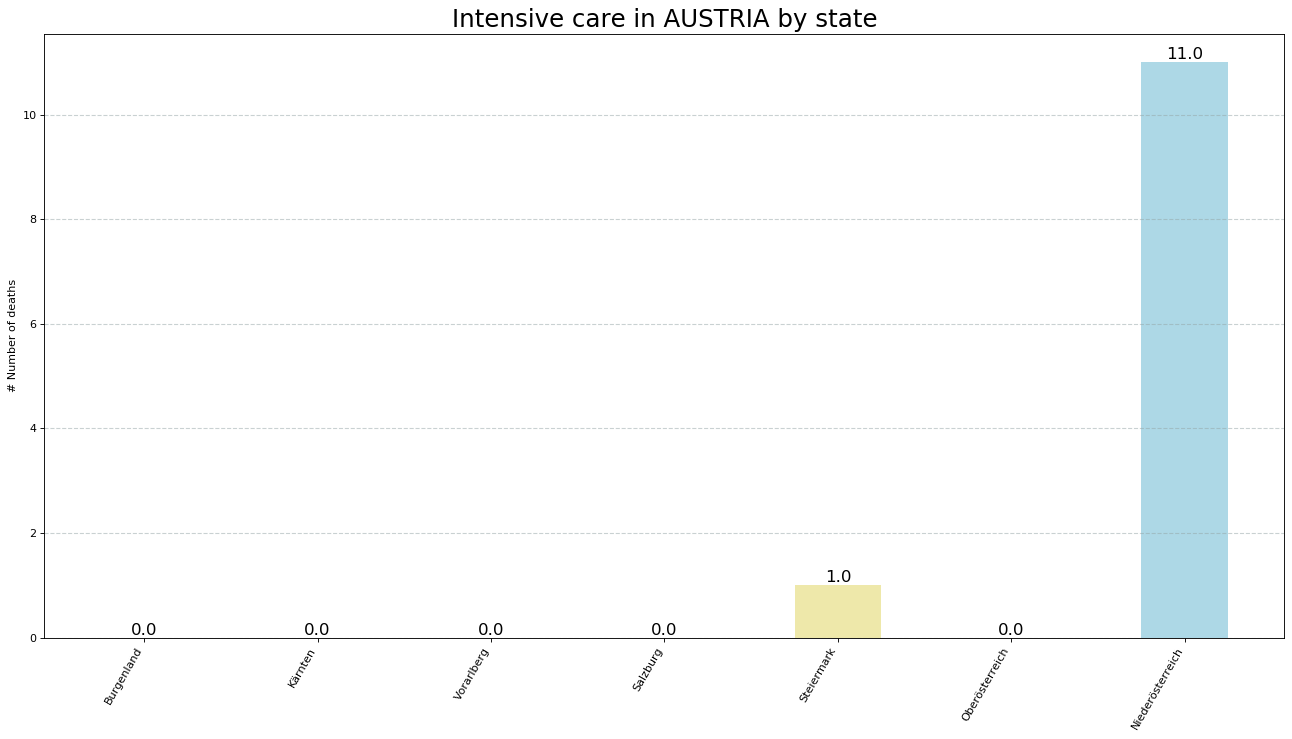

In [48]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','intensive_care']]
n = df['intensive_care'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:7]
y = df['intensive_care'].tolist()[0:7]

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Intensive care in AUSTRIA by state", fontsize=22)
plt.ylabel('# Number of deaths')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/hospitalized.png', dpi=300, format='png')
plt.show()